In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from  collections import Counter
from datetime import datetime

In [64]:
netflix_df = pd.read_csv('netflix_titles.csv', encoding='latin-1')

In [65]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [66]:
summary = netflix_df.describe()
print(summary)

       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


In [67]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [68]:
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [69]:
empty_director = netflix_df[netflix_df['director'].isnull()]
print(empty_director)

     show_id     type                                title director  \
1         s2  TV Show                        Blood & Water      NaN   
3         s4  TV Show                Jailbirds New Orleans      NaN   
4         s5  TV Show                         Kota Factory      NaN   
10       s11  TV Show  Vendetta: Truth, Lies and The Mafia      NaN   
14       s15  TV Show      Crime Stories: India Detectives      NaN   
...      ...      ...                                  ...      ...   
8795   s8796  TV Show                      Yu-Gi-Oh! Arc-V      NaN   
8796   s8797  TV Show                           Yunus Emre      NaN   
8797   s8798  TV Show                            Zak Storm      NaN   
8800   s8801  TV Show                   Zindagi Gulzar Hai      NaN   
8803   s8804  TV Show                          Zombie Dumb      NaN   

                                                   cast  \
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   
3                            

In [70]:
cols = ['director', 'cast', 'country']

netflix_df[cols] = netflix_df[cols].fillna('Unknown')
print(netflix_df[cols])
# fill in  mode
netflix_df['date_added'].fillna(netflix_df['date_added'].mode()[0],inplace=True)
netflix_df['rating'].fillna(netflix_df['rating'].mode()[0],inplace=True)
for i in netflix_df.index:
    if netflix_df.loc[i, 'rating']== 'UR':
        netflix_df.loc[i,'rating']= 'NR'
#drop row with missing values
netflix_df=netflix_df.dropna(subset=['duration'])



             director                                               cast  \
0     Kirsten Johnson                                            Unknown   
1             Unknown  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   
2     Julien Leclercq  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...   
3             Unknown                                            Unknown   
4             Unknown  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...   
...               ...                                                ...   
8802    David Fincher  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...   
8803          Unknown                                            Unknown   
8804  Ruben Fleischer  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...   
8805     Peter Hewitt  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...   
8806      Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   

            country  
0     United States  
1      South Africa  
2           Unknown  

In [71]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [72]:
# Check for duplicate rows
duplicate_rows = netflix_df[netflix_df.duplicated()]

print(duplicate_rows)

Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description]
Index: []


In [73]:
netflix_df = netflix_df.iloc[0:8808:]

In [74]:
netflix_df.drop_duplicates()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [75]:
# Create separate DataFrames for TV Shows and Movies
tv_shows_df = netflix_df[netflix_df['type'] == 'TV Show']
print(tv_shows_df)

     show_id     type                  title         director  \
1         s2  TV Show          Blood & Water          Unknown   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans          Unknown   
4         s5  TV Show           Kota Factory          Unknown   
5         s6  TV Show          Midnight Mass    Mike Flanagan   
...      ...      ...                    ...              ...   
8795   s8796  TV Show        Yu-Gi-Oh! Arc-V          Unknown   
8796   s8797  TV Show             Yunus Emre          Unknown   
8797   s8798  TV Show              Zak Storm          Unknown   
8800   s8801  TV Show     Zindagi Gulzar Hai          Unknown   
8803   s8804  TV Show            Zombie Dumb          Unknown   

                                                   cast  \
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...   
3                                         

In [76]:
movies_df = netflix_df[netflix_df['type'] == 'Movie']
print(movies_df)

     show_id   type                             title  \
0         s1  Movie              Dick Johnson Is Dead   
6         s7  Movie  My Little Pony: A New Generation   
7         s8  Movie                           Sankofa   
9        s10  Movie                      The Starling   
12       s13  Movie                      Je Suis Karl   
...      ...    ...                               ...   
8801   s8802  Movie                           Zinzana   
8802   s8803  Movie                            Zodiac   
8804   s8805  Movie                        Zombieland   
8805   s8806  Movie                              Zoom   
8806   s8807  Movie                            Zubaan   

                            director  \
0                    Kirsten Johnson   
6     Robert Cullen, JosÃ© Luis Ucha   
7                       Haile Gerima   
9                     Theodore Melfi   
12               Christian Schwochow   
...                              ...   
8801                 Majid Al Ansar

In [77]:
# transfer to datetime type
netflix_df['duration_mins']=netflix_df[netflix_df['type']=='Movie']['duration'].str.extract('(\d+)').astype(float)
netflix_df['duration_seasons']=netflix_df[netflix_df['type']=='TV Show']['duration'].str.extract('(\d+)').astype(float)
#NaN values replace with 0
netflix_df[['duration_mins', 'duration_seasons']]= netflix_df[['duration_mins', 'duration_seasons']].fillna(0)
#drop the  duration column
netflix_df=netflix_df.drop('duration', axis=1)


In [78]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_mins,duration_seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",90.0,0.0
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",0.0,2.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,0.0,1.0
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",0.0,1.0
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,0.0,2.0


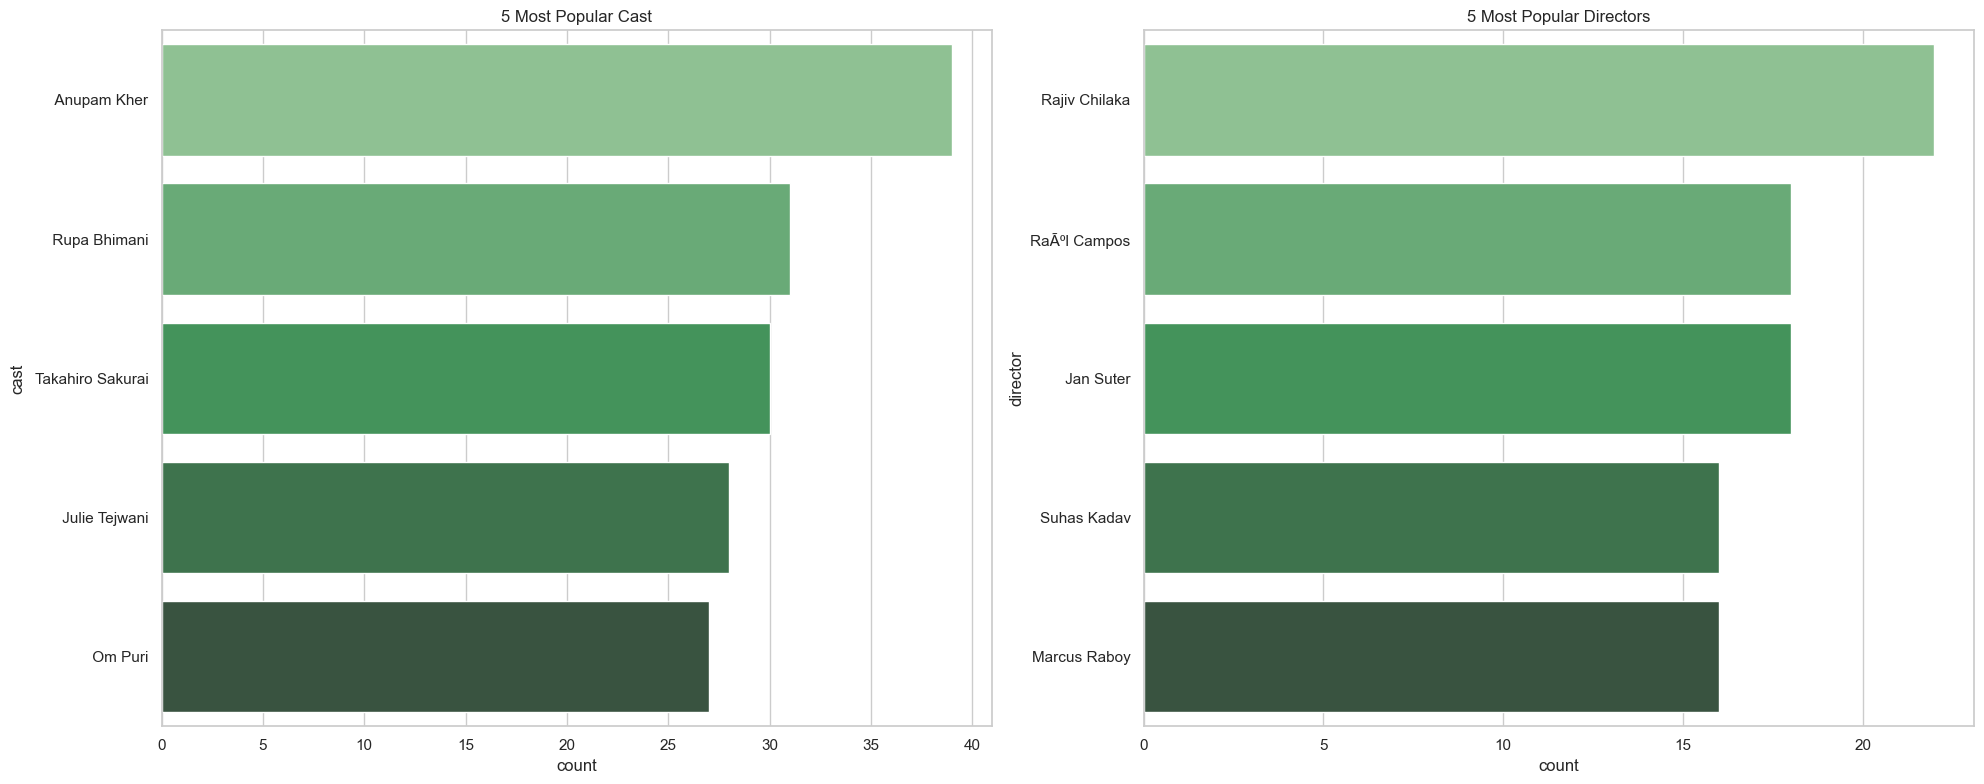

In [83]:

#top  directors
director_list=netflix_df.director.str.split(',').sum()
director_counter=Counter(director_list)
top_5_directors=director_counter.most_common(6)
#top casts
cast_list=netflix_df.cast.str.split(',').sum()
cast_counter=Counter(cast_list)
top_5_cast= cast_counter.most_common(6)

df_top_5_cast=pd.DataFrame(top_5_cast, columns= ['cast', 'count'])
df_top_5_cast= df_top_5_cast.loc[df_top_5_cast['cast']!='Unknown']
df_top_5_directors=pd.DataFrame(top_5_directors, columns=['director', 'count'])
df_top_5_directors=df_top_5_directors.loc[df_top_5_directors['director']!='Unknown']

sns.set_theme(style= "whitegrid")
fig, ax = plt.subplots(1,2, figsize=(20,8))

#plot visuls
sns.barplot(x ='count', y = 'cast', data= df_top_5_cast, palette='Greens_d', ax=ax[0])
ax[0].set_title('5 Most Popular Cast')
sns.barplot(x='count', y= 'director', data=df_top_5_directors, palette='Greens_d', ax=ax[1])
ax[1].set_title('5 Most Popular Directors')

plt.tight_layout()
plt.show()

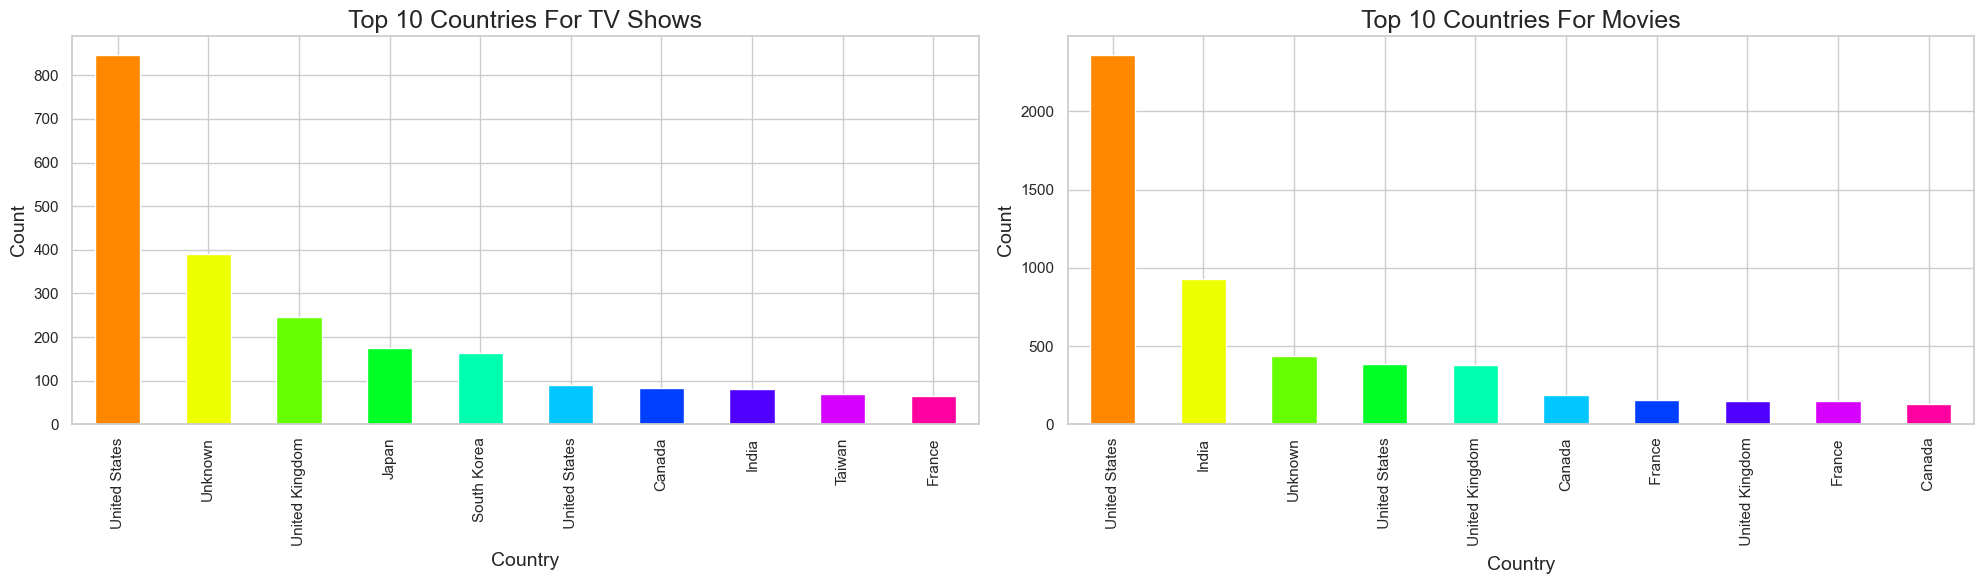

In [84]:
split_countries=netflix_df.assign(country=netflix_df['country'].str.split(',')).explode('country')
split_country_counts=split_countries.groupby(['country', 'type']).size().unstack()

#top 10 countries for Tv Shows and Movies
top_split_countries_tv_shows=split_country_counts['TV Show'].sort_values(ascending= False).head(10)
top_split_countries_movies=split_country_counts['Movie'].sort_values(ascending=False).head(10)


fig, axes= plt.subplots(ncols=2, figsize = (20, 6))


colors= sns.color_palette('hsv', 10)
top_split_countries_tv_shows.plot(kind='bar', ax=axes[0],color=colors)
axes[0].set_title('Top 10 Countries For TV Shows', fontsize=18)
axes[0].set_xlabel('Country', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)

top_split_countries_movies.plot(kind='bar', ax=axes[1],color=colors)
axes[1].set_title('Top 10 Countries For Movies', fontsize=18)
axes[1].set_xlabel('Country', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)

plt.tight_layout()
plt.show()

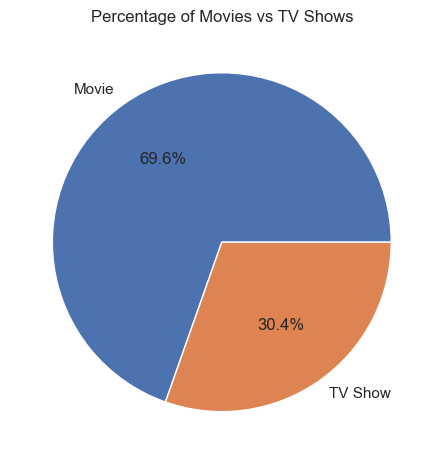

In [92]:


types_counts= netflix_df['type'].value_counts()
type_labels=type_counts.index
type_colors=sns.color_palette('deep', 2)[0:len(type_counts)]
plt.pie(type_counts, labels= type_labels, colors= type_colors, autopct= '%1.1f%%')
plt.title('Percentage of Movies vs TV Shows')

plt.tight_layout()
plt.show()


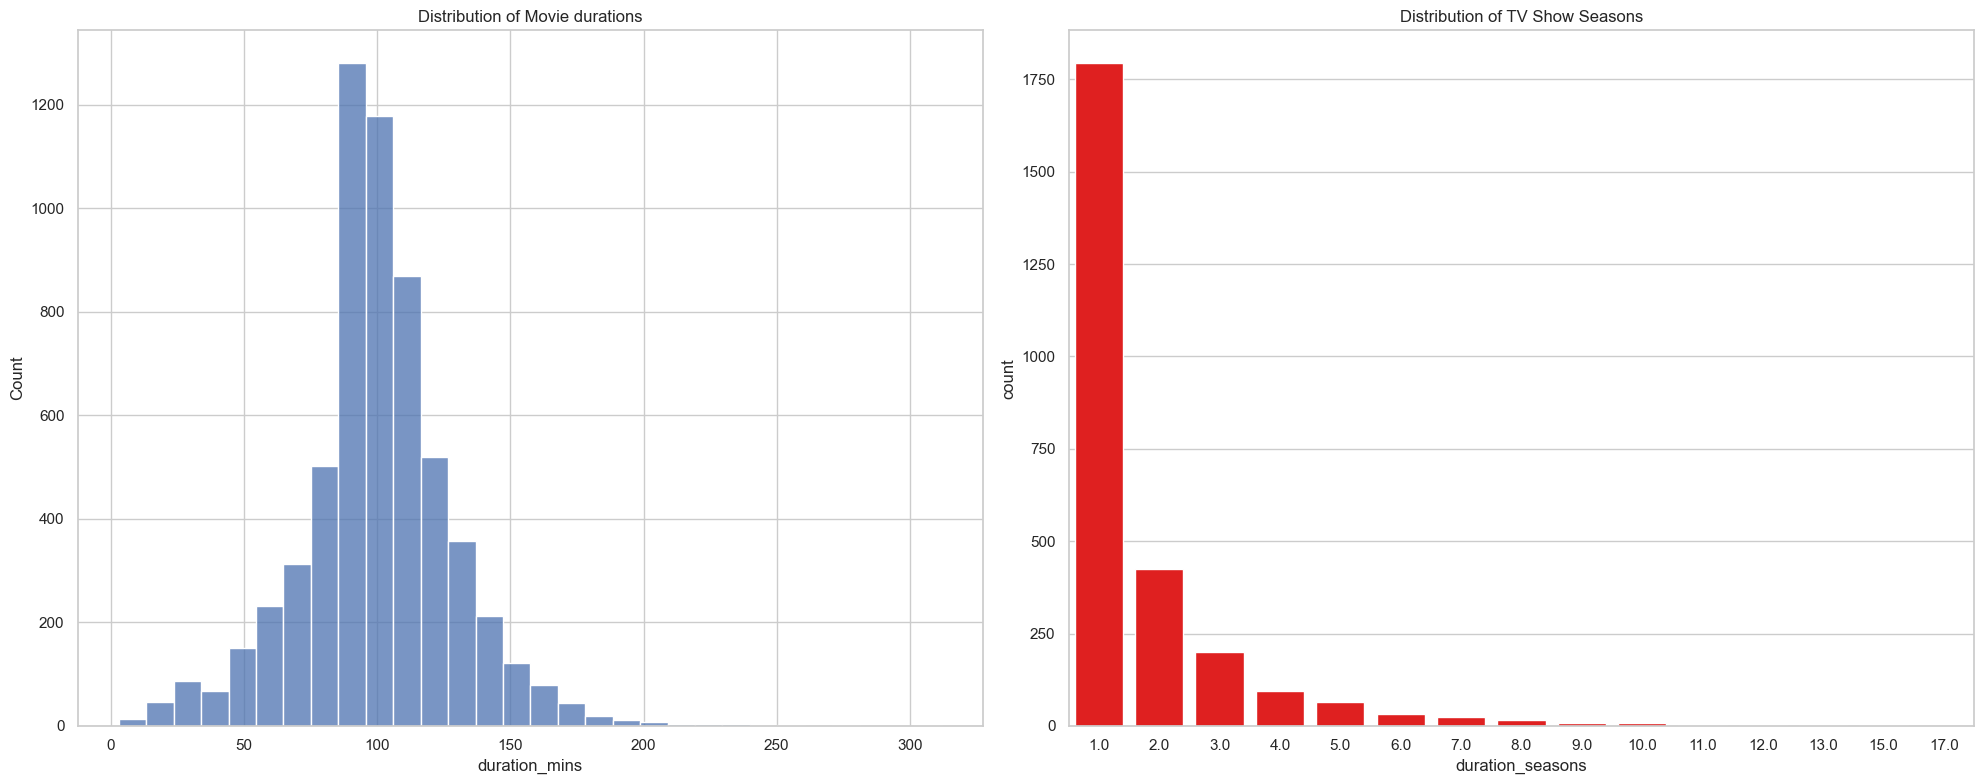

In [102]:
fig, axs= plt.subplots(1,2, figsize=(20,8))

sns.histplot(data=netflix_df[netflix_df['type'] == 'Movie'], x = 'duration_mins', bins=30, ax=axs[0])
axs[0].set_title('Distribution of Movie durations')

sns.countplot(data=netflix_df[netflix_df['type'] == 'TV Show'], x= 'duration_seasons', ax = axs[1], color = 'Red')
axs[1].set_title('Distribution of TV Show Seasons')

plt.tight_layout()
plt.show()